# 미래 예측 feature로 2021~2035 가스수요 예측하기
---

In [67]:
# 모듈 로딩
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl

mpl.rc('font',family='Malgun Gothic')

In [68]:
# 모델 학습할 데이터
train_feature = pd.read_csv('./data_tomato.csv')
train_target = pd.read_csv('./target.csv')
train_feature

,DATE,TCL_AT,TCL_LT,TCL_HT,TEMP_EF_CAP,TEMP_EF_DONGNAM,TEMP_EF_DAEGYUNG,TEMP_EF_CHOONG,TEMP_EF_HONAM,TEMP_EF_MEAN,...,ELEC_SERVICE,ELEC_CIVIL_SUM,ELEC_ARGRI_FISHING,ELEC_MINING,ELEC_MANUFACT,ELEC_INDSUM,RV,GAS_PRICE_IND,OIL_PRICE,QVA
0,1996-01-01,0.004764,-0.189311,0.240528,0.84711,5.91778,6.73765,3.33479,1.88651,3.744768,...,3616542,6988059,301811,80421,8854576,9236808,0.97,26.94,27.86,36550.300000
1,1996-02-01,0.007708,-0.226982,0.372691,0.81430,5.90875,6.73291,3.32638,1.87883,3.732234,...,3551611,6898533,327617,70471,8067220,8465308,0.93,26.94,29.04,36751.000000
2,1996-03-01,0.137972,-0.045631,0.367739,0.60731,5.81529,6.67634,3.22000,1.78740,3.621268,...,3333225,6416945,345359,81877,9250086,9677322,0.96,26.94,27.99,36951.700000
3,1996-04-01,0.261910,0.029456,0.582132,0.24132,5.71003,6.61264,3.07795,1.66054,3.460496,...,3430624,6615182,292235,84596,9274014,9650845,0.94,26.94,28.74,37152.400000
4,1996-05-01,0.428759,0.242892,0.688458,-0.38328,5.67433,6.58956,3.02586,1.62083,3.305460,...,3333483,6370027,302913,80963,9274169,9658045,0.92,26.94,29.18,37365.733333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2020-08-01,3.341732,3.072238,3.949415,-0.52038,5.55479,6.50341,2.91789,1.55535,3.202212,...,12968200,22252059,1432700,110871,20803586,22347157,0.86,72.93,84.71,122745.133333
296,2020-09-01,2.623888,2.040712,3.317034,-0.48046,5.62159,6.57738,2.98076,1.59811,3.259476,...,12489373,22125819,1535383,124192,21325400,22984975,0.80,65.24,81.26,123742.766667
297,2020-10-01,1.844505,1.092630,2.554311,-0.14824,5.67245,6.61732,3.06704,1.64228,3.370170,...,10438455,17725942,1164339,121749,20053280,21339368,0.76,59.16,78.13,124740.400000
298,2020-11-01,1.149119,0.389722,2.114493,0.23138,5.73286,6.65465,3.15240,1.70088,3.494434,...,10989999,18720765,1580276,156931,20689055,22426262,0.75,58.72,78.64,124740.400000


In [69]:
# 자체 예측한 feature
future_feature = pd.read_csv('./data_future.csv')
future_feature

,DATE,POWER_GAS,ELEC_IND_SUM,OIL_PRICE,QVA,TCL_LT,TEMP_EF,ELEC_SERVICE
0,2021-01-01,21004815,24009895,106.270957,122715.511387,-0.819359,3.720112,1.546123e+07
1,2021-02-01,19006411,22411095,106.452033,123791.588066,-0.488770,3.663880,1.485668e+07
2,2021-03-01,17216940,23047185,106.615613,123126.447539,0.108879,3.557796,1.291000e+07
3,2021-04-01,15290843,22640767,106.796638,123534.791822,0.929050,3.418933,1.228525e+07
4,2021-05-01,15763108,22310541,106.971887,123756.051487,1.691170,3.297840,1.092951e+07
...,...,...,...,...,...,...,...,...
175,2035-08-01,23623051,27327684,137.373064,144116.665066,3.940146,3.173664,1.651412e+07
176,2035-09-01,21558395,26481467,137.554127,145813.462779,2.922097,3.231943,1.524711e+07
177,2035-10-01,20954172,26795426,137.729350,145918.753203,1.620847,3.358512,1.358630e+07
178,2035-11-01,21861274,27345267,137.910414,146304.640846,0.430566,3.507064,1.477608e+07


In [70]:
train_target[['CIVIL','IND']]

,CIVIL,IND
0,605519,83809
1,566323,70427
2,477514,62652
3,337797,47050
4,184522,30709
...,...,...
295,398661,457970
296,380235,525619
297,616682,600890
298,1093747,665901


In [71]:
train_all =pd.concat([train_feature,train_target[['CIVIL','IND']]], axis =1)
train_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE                300 non-null    object 
 1   TCL_AT              300 non-null    float64
 2   TCL_LT              300 non-null    float64
 3   TCL_HT              300 non-null    float64
 4   TEMP_EF_CAP         300 non-null    float64
 5   TEMP_EF_DONGNAM     300 non-null    float64
 6   TEMP_EF_DAEGYUNG    300 non-null    float64
 7   TEMP_EF_CHOONG      300 non-null    float64
 8   TEMP_EF_HONAM       300 non-null    float64
 9   TEMP_EF_MEAN        300 non-null    float64
 10  POWER_WATER         300 non-null    int64  
 11  POWER_FIRE          300 non-null    int64  
 12  POWER_NUCLEAR       300 non-null    int64  
 13  POWER_NAEYEON       300 non-null    int64  
 14  POWER_GROUP         300 non-null    int64  
 15  POWER_TRANS         300 non-null    int64  
 16  POWER_GA

In [72]:
# 1996~2020
train_all = train_all[['DATE','POWER_GAS','ELEC_INDSUM','OIL_PRICE','QVA','TCL_LT'	,'TEMP_EF_MEAN','ELEC_SERVICE', 'CIVIL','IND']]

# 1996~2020 feature
train_data = train_all.drop(['DATE','CIVIL','IND'], axis =1)

# 1996~2020 target
train_target = train_all[['CIVIL','IND']]
train_target_C = train_all['CIVIL']
train_target_I = train_all['IND']

# 2021~2035
test_data = future_feature.drop(['DATE'], axis =1)
test_data.columns = ['POWER_GAS','ELEC_INDSUM','OIL_PRICE','QVA','TCL_LT','TEMP_EF_MEAN','ELEC_SERVICE']

# 1996~2035
feature_all = pd.concat([train_data,test_data])
feature_all = feature_all.reset_index(drop = True) 
feature_all

,POWER_GAS,ELEC_INDSUM,OIL_PRICE,QVA,TCL_LT,TEMP_EF_MEAN,ELEC_SERVICE
0,8408979,9236808,27.860000,36550.300000,-0.189311,3.744768,3.616542e+06
1,7593086,8465308,29.040000,36751.000000,-0.226982,3.732234,3.551611e+06
2,8306941,9677322,27.990000,36951.700000,-0.045631,3.621268,3.333225e+06
3,8299351,9650845,28.740000,37152.400000,0.029456,3.460496,3.430624e+06
4,8156027,9658045,29.180000,37365.733333,0.242892,3.305460,3.333483e+06
...,...,...,...,...,...,...,...
475,23623051,27327684,137.373064,144116.665066,3.940146,3.173664,1.651412e+07
476,21558395,26481467,137.554127,145813.462779,2.922097,3.231943,1.524711e+07
477,20954172,26795426,137.729350,145918.753203,1.620847,3.358512,1.358630e+07
478,21861274,27345267,137.910414,146304.640846,0.430566,3.507064,1.477608e+07


In [73]:
train_target


,CIVIL,IND
0,605519,83809
1,566323,70427
2,477514,62652
3,337797,47050
4,184522,30709
...,...,...
295,398661,457970
296,380235,525619
297,616682,600890
298,1093747,665901


### 스케일링
---

In [74]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_target = MinMaxScaler()
scale_cols = ['POWER_GAS','ELEC_INDSUM','OIL_PRICE','QVA','TCL_LT','TEMP_EF_MEAN','ELEC_SERVICE']

# 스케일링
train_data_scaled = scaler.fit_transform(train_data[scale_cols])
test_data_scaled = scaler.fit_transform(test_data[scale_cols])
feature_all_scaled = scaler.fit_transform(feature_all[scale_cols])

train_target_scaled = scaler_target.fit_transform(train_target)

# 데이터프레임으로 변환
train_data_scaled = pd.DataFrame(train_data_scaled)
test_data_scaled = pd.DataFrame(test_data_scaled)
feature_all_scaled = pd.DataFrame(feature_all_scaled)
train_target_scaled = pd.DataFrame(train_target_scaled)

# 데이터프레임 컬럼명 생성
train_data_scaled.columns = scale_cols
test_data_scaled.columns = scale_cols
feature_all_scaled.columns = scale_cols

train_target_scaled.columns = ['CIVIL','IND']
train_target_scaled_C = train_target_scaled['CIVIL']
train_target_scaled_I = train_target_scaled['IND']


# [ 최종형태 ]

#### 1996~2020 feature ####
# train_data_scaled.info()

#### 1996~2020 target ####
# train_target_scaled_C.info() 
# train_target_scaled_I.info()

#### 2021~2035 feature #### 
# test_data_scaled.info()


In [75]:
# 1996~2035 feature
feature_all_scaled[288:]

,POWER_GAS,ELEC_INDSUM,OIL_PRICE,QVA,TCL_LT,TEMP_EF_MEAN,ELEC_SERVICE
288,0.634826,0.757511,0.537019,0.798716,0.185489,0.741927,0.697517
289,0.511885,0.703409,0.482267,0.765871,0.142801,0.709549,0.661374
290,0.374792,0.737817,0.344569,0.733027,0.282907,0.557194,0.556046
291,0.435028,0.674569,0.210856,0.700182,0.381237,0.455845,0.494047
292,0.424232,0.619866,0.210036,0.726088,0.557465,0.260096,0.455420
...,...,...,...,...,...,...,...
475,0.946996,0.956416,0.641966,0.980212,0.997474,0.064203,0.839816
476,0.835970,0.913614,0.643028,0.995558,0.798084,0.149245,0.759137
477,0.803478,0.929494,0.644055,0.996510,0.543227,0.333938,0.653383
478,0.852257,0.957305,0.645116,1.000000,0.310105,0.550709,0.729144


### Split dataset
---
- train, val, test

In [76]:
# train, val, test 범위 설정

TEST_SIZE = 60 # 테스트: 2015~2020(60개월) / 학습: 1996~2014(240개월)
WINDOW_SIZE = 12 # 학습시킬 과거 개월 단위(12개월)

# 학습 데이터 
x_train = train_data_scaled[:-TEST_SIZE] # 1996~2014
x_val = train_data_scaled[-TEST_SIZE:] # 2015~2020
x_test = test_data_scaled # 2021~2035(최종 목표)
x_test_final = feature_all_scaled[288:]

# target 산업용
y_train_C = train_target_scaled_C[:-TEST_SIZE] # 1996~2014
y_val_C = train_target_scaled_C[-TEST_SIZE:] # 2015~2020
# target 민수용
y_train_I = train_target_scaled_I[:-TEST_SIZE] # 1996~2014
y_val_I = train_target_scaled_I[-TEST_SIZE:] # 2015~2020

In [77]:
print('[ 1996~2015 train/target 데이터 ]')
print(f'x_train.shape: {x_train.shape}, y_train_C.shape: {y_train_C.shape}, y_train_I.shape: {y_train_I.shape}') 
print()
print('[ 2016~2020 train/target 데이터 ]')
print(f'x_val.shape  : {x_val.shape},  y_train_C.shape: {y_val_C.shape}, y_train_I.shape: {y_val_I.shape}') 
print()
print('[ 최종 2021~2035 테스트 데이터 ]')
print(f'x_test_final.shape : {x_test_final.shape}')
print() 

[ 1996~2015 train/target 데이터 ]
x_train.shape: (240, 7), y_train_C.shape: (240,), y_train_I.shape: (240,)

[ 2016~2020 train/target 데이터 ]
x_val.shape  : (60, 7),  y_train_C.shape: (60,), y_train_I.shape: (60,)

[ 최종 2021~2035 테스트 데이터 ]
x_test_final.shape : (192, 7)



# 과거학습
---

1. 민수용

In [78]:
# 과거 데이터 학습 함수(target 존재시)
def make_dataset1(data, label, window_size=12):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size): # 데이터 개월 개수 - 학습할 과거개월수 
        feature_list.append(np.array(data.iloc[i:i+window_size])) # 시작 개월 ~ 12개월
        label_list.append(np.array(label.iloc[i+window_size])) # 12개월 후 타겟 데이터
    return np.array(feature_list), np.array(label_list)

# 과거 데이터 학습 함수(target 존재하지 않을 시)
# test용
def make_dataset2(data, label, window_size=12):
    test_list = []
    for i in range(len(data) - window_size): # 데이터 개월 개수 - 학습할 과거개월수 
        test_list.append(np.array(data.iloc[i:i+window_size])) # 시작 개월 ~ 12개월 # 12개월 후 타겟 데이터
    return np.array(test_list)

In [79]:
# train, val, test 범위 설정

TEST_SIZE = 36 # 테스트: 2015~2020(60개월) / 학습: 1996~2014(240개월)
WINDOW_SIZE = 12 # 학습시킬 과거 개월 단위(12개월)

# 학습 데이터 
x_train = train_data_scaled[:-TEST_SIZE] # 1996~2014
x_val = train_data_scaled[-TEST_SIZE:] # 2015~2020
x_test = test_data_scaled # 2021~2035(최종 목표)
x_test_final = feature_all_scaled[288:]

# target 민수용(스케일 적용)
y_train_C = train_target_scaled_C[:-TEST_SIZE] # 1996~2014
y_val_C = train_target_scaled_C[-TEST_SIZE:] # 2015~2020
# target 민수용(스케일 X)
y_train_C = train_target_C[:-TEST_SIZE] # 1996~2014
y_val_C = train_target_C[-TEST_SIZE:] # 2015~2020


In [80]:
x_train.shape, y_train_C.shape

((264, 7), (264,))

In [81]:
# train, valid, test 과거학습 단위 생성

# 과거 12개월-> 다음 1개월 예측( 1996~2014년 )
# 민수용 
x_train, y_train_C = make_dataset1(x_train, y_train_C, WINDOW_SIZE)
x_val, y_val_C = make_dataset1(x_val, y_val_C, WINDOW_SIZE)

# test용 (2021~2035년)
x_test = make_dataset2(x_test_final, WINDOW_SIZE)

In [82]:
print('[ 1996~2015 train/target 데이터 ]')
print(f'x_train.shape: {x_train.shape}, y_train_C.shape: {y_train_C.shape}, y_train_I.shape: {y_train_I.shape}') 
print()
print('[ 2016~2020 train/target 데이터 ]')
print(f'x_val.shape  : {x_val.shape},  y_train_C.shape: {y_val_C.shape}, y_train_I.shape: {y_val_I.shape}') 
print()
print('[ 2021~2035 train 데이터 ]')
print(f'x_test.shape : {x_test_final.shape}')
print() 

[ 1996~2015 train/target 데이터 ]
x_train.shape: (252, 12, 7), y_train_C.shape: (252,), y_train_I.shape: (240,)

[ 2016~2020 train/target 데이터 ]
x_val.shape  : (24, 12, 7),  y_train_C.shape: (24,), y_train_I.shape: (60,)

[ 2021~2035 train 데이터 ]
x_test.shape : (192, 7)



### 모형 학습
---
1. 민수용

In [83]:
# create LSTM model
from random import shuffle
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model_C = Sequential()
model_C.add(LSTM(17, 
                input_shape=(x_train.shape[1], x_train.shape[2]), 
                activation='relu', 
                return_sequences=False)
            )
# model_C.add(LSTM(32))

model_C.add(Dense(1))

In [84]:
# LSTM model compile

model_C.compile(loss='mae', optimizer='adam')
#early_stop = EarlyStopping(monitor='val_loss', patience=5)

# import os
#model_path = 'model'
#filename = os.path.join(model_path, 'tmp_checkpoint.h5')
#checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model_C.fit(x_train, y_train_C, 
                                    epochs=300, 
                                    batch_size=16,
                                    validation_data=(x_val, y_val_C))
                                    #callbacks=[early_stop])

Epoch 1/300
16/16 [==============================] - 1s 15ms/step - loss: 762690.3125 - val_loss: 943561.0625
Epoch 2/300
16/16 [==============================] - 0s 4ms/step - loss: 762688.8750 - val_loss: 943553.1875
Epoch 3/300
16/16 [==============================] - 0s 4ms/step - loss: 762668.1875 - val_loss: 943371.3125
Epoch 4/300
16/16 [==============================] - 0s 4ms/step - loss: 762301.4375 - val_loss: 940545.8125
Epoch 5/300
16/16 [==============================] - 0s 3ms/step - loss: 757651.3125 - val_loss: 914761.8125
Epoch 6/300
16/16 [==============================] - 0s 4ms/step - loss: 709614.3750 - val_loss: 674801.3125
Epoch 7/300
16/16 [==============================] - 0s 4ms/step - loss: 492736.8438 - val_loss: 514656.5938
Epoch 8/300
16/16 [==============================] - 0s 3ms/step - loss: 391189.5625 - val_loss: 481727.7188
Epoch 9/300
16/16 [==============================] - 0s 3ms/step - loss: 368881.0938 - val_loss: 468015.2500
Epoch 10/300
16/16

### 예측 및 시각화(val_data)
---

1. 민수용

In [85]:
# 예측
pred_C = model_C.predict(x_val)
pred_C.shape

1/1 [==============================] - 0s 146ms/step


(24, 1)

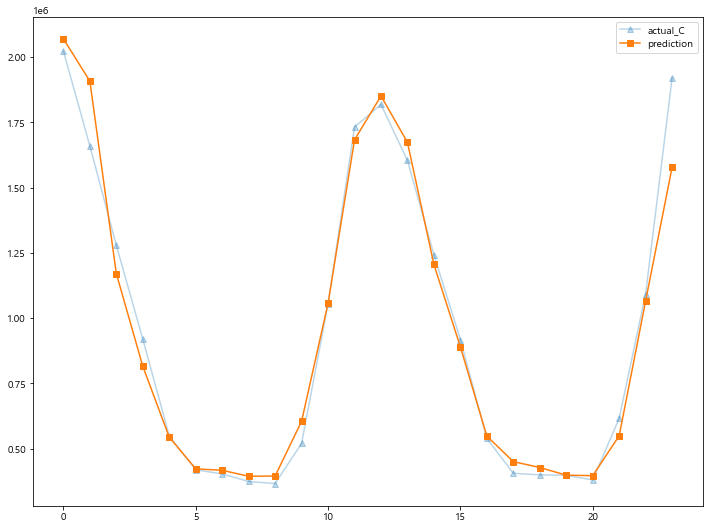

In [86]:
# 시각화
plt.figure(figsize=(12, 9))
#plt.plot(target_i, label = 'total_actual')
plt.plot(y_val_C,'^-', label = 'actual_C', alpha =0.3)
plt.plot(pred_C,'s-', label = 'prediction')
plt.legend()
plt.show()

### 모형 학습
---
2. 산업용

In [87]:
# train, val, test 범위 설정

TEST_SIZE = 60 # 테스트: 2015~2020(60개월) / 학습: 1996~2014(240개월)
WINDOW_SIZE = 12 # 학습시킬 과거 개월 단위(12개월)

# 학습 데이터 
x_train = train_data_scaled[:-TEST_SIZE] # 1996~2014
x_val = train_data_scaled[-TEST_SIZE:] # 2015~2020
x_test_final = test_data_scaled # 2021~2035(최종 목표)

# target 민수용(스케일 적용)
y_train_I = train_target_scaled_I[:-TEST_SIZE] # 1996~2014
y_val_I = train_target_scaled_I[-TEST_SIZE:] # 2015~2020
# target 민수용(스케일X)
y_train_I = train_target_I[:-TEST_SIZE] # 1996~2014
y_val_I = train_target_I[-TEST_SIZE:] # 2015~2020


# [ 최종 전용 (학습 300개월, 예측 180개월) ] 
# 학습 데이터
x_train = train_data_scaled #1996~2020
# target 민수용(스케일 X)
y_train_I = train_target_I # 1996~2020

In [88]:
x_test_final.shape

(180, 7)

In [89]:
# train, valid, test 과거학습 단위 생성

# 과거 12개월-> 다음 1개월 예측( 1996~2014년 )

# 산업용
x_train, y_train_I = make_dataset1(x_train, y_train_I, WINDOW_SIZE)
x_val, y_val_I = make_dataset1(x_val, y_val_I, WINDOW_SIZE)

# test용 (2021~2035년)
x_test_final = make_dataset2(x_test_final, WINDOW_SIZE)

In [90]:
print('[ 1996~2015 train/target 데이터 ]')
print(f'x_train.shape: {x_train.shape}, y_train_C.shape: {y_train_C.shape}, y_train_I.shape: {y_train_I.shape}') 
print()
print('[ 2016~2020 train/target 데이터 ]')
print(f'x_val.shape  : {x_val.shape},  y_train_C.shape: {y_val_C.shape}, y_train_I.shape: {y_val_I.shape}') 
print()
print('[ 2021~2035 train 데이터 ]')
print(f'x_test.shape : {x_test_final.shape}')
print() 

[ 1996~2015 train/target 데이터 ]
x_train.shape: (288, 12, 7), y_train_C.shape: (252,), y_train_I.shape: (288,)

[ 2016~2020 train/target 데이터 ]
x_val.shape  : (48, 12, 7),  y_train_C.shape: (24,), y_train_I.shape: (48,)

[ 2021~2035 train 데이터 ]
x_test.shape : (168, 12, 7)



In [91]:
# create LSTM model
from random import shuffle
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model_I = Sequential()
model_I.add(LSTM(16, 
                input_shape=(x_train.shape[1], x_train.shape[2]), 
                activation='relu', 
                return_sequences=False)
            )

model_I.add(Dense(1))

In [92]:
# LSTM model compile

model_I.compile(loss='mae', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# import os
#model_path = 'model_I'
#filename = os.path.join(model_path, 'tmp_checkpoint.h5')
#checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model_I.fit(x_train, y_train_I, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(x_val, y_val_I))
                                    # callbacks=[early_stop])

Epoch 1/200
18/18 [==============================] - 1s 15ms/step - loss: 432188.4062 - val_loss: 616580.9375
Epoch 2/200
18/18 [==============================] - 0s 3ms/step - loss: 432186.8750 - val_loss: 616571.9375
Epoch 3/200
18/18 [==============================] - 0s 3ms/step - loss: 432151.8125 - val_loss: 616320.1875
Epoch 4/200
18/18 [==============================] - 0s 3ms/step - loss: 431461.2812 - val_loss: 612221.1875
Epoch 5/200
18/18 [==============================] - 0s 3ms/step - loss: 420555.6562 - val_loss: 555774.9375
Epoch 6/200
18/18 [==============================] - 0s 3ms/step - loss: 263738.9375 - val_loss: 253160.1719
Epoch 7/200
18/18 [==============================] - 0s 3ms/step - loss: 97663.4453 - val_loss: 84073.1641
Epoch 8/200
18/18 [==============================] - 0s 3ms/step - loss: 67151.8281 - val_loss: 80927.5078
Epoch 9/200
18/18 [==============================] - 0s 3ms/step - loss: 59859.3203 - val_loss: 76868.3828
Epoch 10/200
18/18 [====

### 예측 및 시각화(val_data)
---
- 산업용

In [93]:
pred_I = model_I.predict(x_val)
pred_I.shape

2/2 [==============================] - 0s 0s/step


(48, 1)

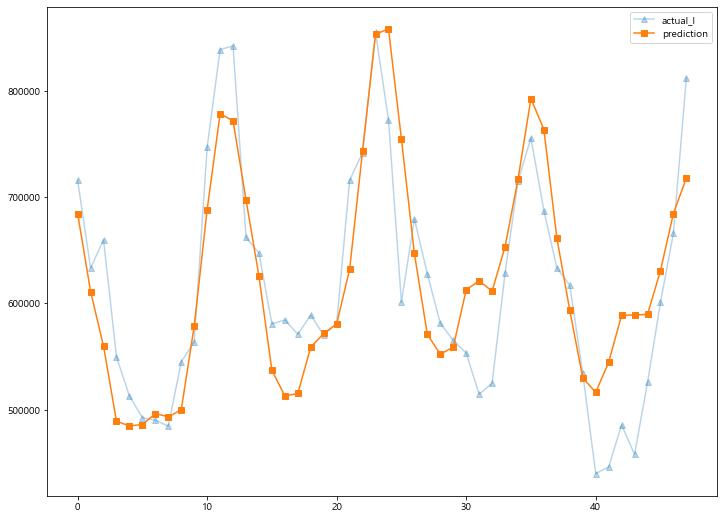

In [94]:
# 시각화
plt.figure(figsize=(12, 9))
#plt.plot(target_i, label = 'total_actual')
plt.plot(y_val_I,'^-', label = 'actual_I',alpha=0.3)
plt.plot(pred_I,'s-', label = 'prediction')
plt.legend()
plt.show()

In [95]:
pred_C, pred_I

(array([[2070614.6 ],
        [1908582.1 ],
        [1171205.1 ],
        [ 815859.56],
        [ 544396.56],
        [ 423083.66],
        [ 417452.62],
        [ 394611.8 ],
        [ 395515.44],
        [ 605192.9 ],
        [1057143.4 ],
        [1683338.2 ],
        [1851522.5 ],
        [1673923.9 ],
        [1205945.6 ],
        [ 890407.9 ],
        [ 548491.6 ],
        [ 450655.  ],
        [ 428120.34],
        [ 398815.8 ],
        [ 396867.72],
        [ 549625.3 ],
        [1066741.5 ],
        [1578562.2 ]], dtype=float32),
 array([[684378.8 ],
        [611079.06],
        [559753.5 ],
        [489081.3 ],
        [484832.66],
        [485989.56],
        [496305.56],
        [493326.5 ],
        [499903.34],
        [578656.75],
        [688121.25],
        [778300.2 ],
        [771568.25],
        [697407.56],
        [625537.25],
        [536953.5 ],
        [512972.75],
        [515261.6 ],
        [558879.44],
        [571682.  ],
        [580732.75],
        [63196

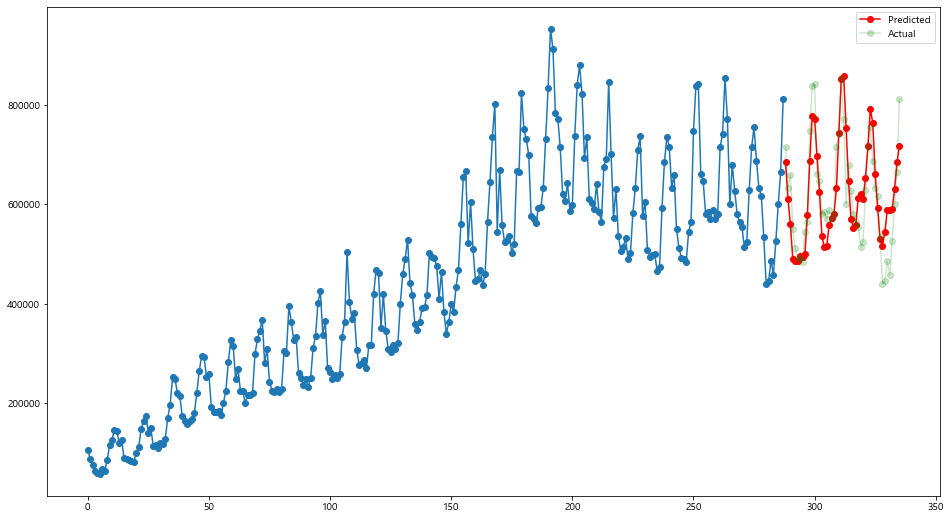

In [96]:
# [ 예측 결과 시각화: 전체흐름 파악용 ]
a_axis = np.arange(0, len(y_train_I))
b_axis = np.arange(len(y_train_I), len(y_train_I) + len(pred_I))

plt.figure(figsize=(16,9)) # .reshape(x_train.shape[0],) 
plt.plot(a_axis, y_train_I, 'o-') 
plt.plot(b_axis, pred_I, 'o-', color='red', label='Predicted')
plt.plot(b_axis, y_val_I, 'o-', color='green', alpha=0.2, label='Actual')
plt.legend()
plt.show()

### 최종 2021~2035 예측 및 시각화 
--- 

In [97]:
# 모듈 로딩
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl

mpl.rc('font',family='Malgun Gothic')

In [98]:
# 모델 학습할 데이터
train_feature = pd.read_csv('./data_tomato.csv')
train_target = pd.read_csv('./target.csv')
train_feature

# 자체 예측한 feature
future_feature = pd.read_csv('./data_future.csv')
future_feature

train_all =pd.concat([train_feature,train_target[['CIVIL','IND']]], axis =1)
train_all.info()


future_feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE                300 non-null    object 
 1   TCL_AT              300 non-null    float64
 2   TCL_LT              300 non-null    float64
 3   TCL_HT              300 non-null    float64
 4   TEMP_EF_CAP         300 non-null    float64
 5   TEMP_EF_DONGNAM     300 non-null    float64
 6   TEMP_EF_DAEGYUNG    300 non-null    float64
 7   TEMP_EF_CHOONG      300 non-null    float64
 8   TEMP_EF_HONAM       300 non-null    float64
 9   TEMP_EF_MEAN        300 non-null    float64
 10  POWER_WATER         300 non-null    int64  
 11  POWER_FIRE          300 non-null    int64  
 12  POWER_NUCLEAR       300 non-null    int64  
 13  POWER_NAEYEON       300 non-null    int64  
 14  POWER_GROUP         300 non-null    int64  
 15  POWER_TRANS         300 non-null    int64  
 16  POWER_GA

,DATE,POWER_GAS,ELEC_IND_SUM,OIL_PRICE,QVA,TCL_LT,TEMP_EF,ELEC_SERVICE
0,2021-01-01,21004815,24009895,106.270957,122715.511387,-0.819359,3.720112,1.546123e+07
1,2021-02-01,19006411,22411095,106.452033,123791.588066,-0.488770,3.663880,1.485668e+07
2,2021-03-01,17216940,23047185,106.615613,123126.447539,0.108879,3.557796,1.291000e+07
3,2021-04-01,15290843,22640767,106.796638,123534.791822,0.929050,3.418933,1.228525e+07
4,2021-05-01,15763108,22310541,106.971887,123756.051487,1.691170,3.297840,1.092951e+07
...,...,...,...,...,...,...,...,...
175,2035-08-01,23623051,27327684,137.373064,144116.665066,3.940146,3.173664,1.651412e+07
176,2035-09-01,21558395,26481467,137.554127,145813.462779,2.922097,3.231943,1.524711e+07
177,2035-10-01,20954172,26795426,137.729350,145918.753203,1.620847,3.358512,1.358630e+07
178,2035-11-01,21861274,27345267,137.910414,146304.640846,0.430566,3.507064,1.477608e+07


In [99]:
# 1996~2020
train_all = train_all[['DATE','POWER_GAS','ELEC_INDSUM','OIL_PRICE','QVA','TCL_LT'	,'TEMP_EF_MEAN','ELEC_SERVICE', 'CIVIL','IND']]

# 1996~2020 feature
train_data = train_all.drop(['DATE','CIVIL','IND'], axis =1)

# 1996~2020 target
train_target = train_all[['CIVIL','IND']]
train_target_C = train_all['CIVIL']
train_target_I = train_all['IND']

# 2021~2035
test_data = future_feature.drop(['DATE'], axis =1)
test_data.columns = ['POWER_GAS','ELEC_INDSUM','OIL_PRICE','QVA','TCL_LT','TEMP_EF_MEAN','ELEC_SERVICE']

# 1996~2035
feature_all = pd.concat([train_data,test_data])
feature_all = feature_all.reset_index(drop = True) 
feature_all

,POWER_GAS,ELEC_INDSUM,OIL_PRICE,QVA,TCL_LT,TEMP_EF_MEAN,ELEC_SERVICE
0,8408979,9236808,27.860000,36550.300000,-0.189311,3.744768,3.616542e+06
1,7593086,8465308,29.040000,36751.000000,-0.226982,3.732234,3.551611e+06
2,8306941,9677322,27.990000,36951.700000,-0.045631,3.621268,3.333225e+06
3,8299351,9650845,28.740000,37152.400000,0.029456,3.460496,3.430624e+06
4,8156027,9658045,29.180000,37365.733333,0.242892,3.305460,3.333483e+06
...,...,...,...,...,...,...,...
475,23623051,27327684,137.373064,144116.665066,3.940146,3.173664,1.651412e+07
476,21558395,26481467,137.554127,145813.462779,2.922097,3.231943,1.524711e+07
477,20954172,26795426,137.729350,145918.753203,1.620847,3.358512,1.358630e+07
478,21861274,27345267,137.910414,146304.640846,0.430566,3.507064,1.477608e+07


In [100]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_target = MinMaxScaler()
# 전체
# scale_cols = ['POWER_GAS','ELEC_INDSUM','OIL_PRICE','QVA','TCL_LT','TEMP_EF_MEAN','ELEC_SERVICE']
# 산업용
scale_cols = ['POWER_GAS','ELEC_INDSUM','OIL_PRICE','QVA','TEMP_EF_MEAN']

# 스케일링
train_data_scaled = scaler.fit_transform(train_data[scale_cols])
feature_all_scaled = scaler.fit_transform(feature_all[scale_cols])

train_target_scaled = scaler_target.fit_transform(train_target)

# 데이터프레임으로 변환
train_data_scaled = pd.DataFrame(train_data_scaled)
feature_all_scaled = pd.DataFrame(feature_all_scaled)
train_target_scaled = pd.DataFrame(train_target_scaled)

# 데이터프레임 컬럼명 생성
train_data_scaled.columns = scale_cols
feature_all_scaled.columns = scale_cols

train_target_scaled.columns = ['CIVIL','IND']
train_target_scaled_C = train_target_scaled['CIVIL']
train_target_scaled_I = train_target_scaled['IND']

In [101]:
# 과거 데이터 학습 함수(target 존재시)
def make_dataset1(data, label, window_size=12):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size): # 데이터 개월 개수 - 학습할 과거개월수 
        feature_list.append(np.array(data.iloc[i:i+window_size])) # 시작 개월 ~ 12개월
        label_list.append(np.array(label.iloc[i+window_size])) # 12개월 후 타겟 데이터
    return np.array(feature_list), np.array(label_list)

In [102]:
# 과거 데이터 학습 함수(target 존재하지 않을 시)
# 최종 test용
def make_dataset3(data, window_size=12):
    test_list = []
    for i in range(len(data)-window_size): # 데이터 개월 수 
        test_list.append(np.array(data.iloc[i:i+window_size])) # 시작 개월 ~ 12개월 # 12개월 후 타겟 데이터
    return np.array(test_list)

1.산업용(IND)

In [103]:
feature_all_scaled.shape

(480, 7)

In [104]:
# [ 최종 전용 (학습 300개월, 예측 180개월) ] 

# 학습 데이터
x_train = train_data_scaled #1996~2020
# target 산업용(스케일 X)
y_train_I = train_target_I # 1996~2020

# 최종테스트용 x_test
x_test_final = feature_all_scaled[286:]


x_train.shape, y_train_I.shape, x_test_final.shape

((300, 7), (300,), (192, 7))

In [105]:
# train, valid, test 과거학습 단위 생성

# 과거 12개월-> 다음 1개월 예측( 1996~2014년 )
WINDOW_SIZE = 14

# 산업용
x_train, y_train_I = make_dataset1(x_train, y_train_I, WINDOW_SIZE)

# test용 (2021~2035년)
x_test_final = make_dataset3(x_test_final, WINDOW_SIZE)

In [106]:
print('[ 1996~2015 train/target 데이터 ]')
print(f'x_train.shape: {x_train.shape}, y_train_I.shape: {y_train_I.shape}') 
print()
print('[ 2021~2035 train 데이터 ]')
print(f'x_test_final.shape : {x_test_final.shape}')
print() 

[ 1996~2015 train/target 데이터 ]
x_train.shape: (288, 12, 7), y_train_I.shape: (288,)

[ 2021~2035 train 데이터 ]
x_test_final.shape : (180, 12, 7)



In [107]:
# create LSTM model-------------------------------------------------------------------
from random import shuffle
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model_I = Sequential()
model_I.add(LSTM(32, 
                input_shape=(x_train.shape[1], x_train.shape[2]), 
                activation='relu', 
                return_sequences=False)
            )

model_I.add(Dense(1))

# LSTM model compile-------------------------------------------------------------------

model_I.compile(loss='mae', optimizer='adam')

history = model_I.fit(x_train, y_train_I, 
                                    epochs=200, 
                                    batch_size=16)


Epoch 1/50
18/18 [==============================] - 1s 5ms/step - loss: 432185.9375
Epoch 2/50
18/18 [==============================] - 0s 4ms/step - loss: 411465.8125
Epoch 3/50
18/18 [==============================] - 0s 4ms/step - loss: 170580.1406
Epoch 4/50
18/18 [==============================] - 0s 4ms/step - loss: 81686.9844
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 52064.5898
Epoch 6/50
18/18 [==============================] - 0s 4ms/step - loss: 54959.4570
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 53381.8750
Epoch 8/50
18/18 [==============================] - 0s 4ms/step - loss: 45641.3828
Epoch 9/50
18/18 [==============================] - 0s 4ms/step - loss: 43845.4609
Epoch 10/50
18/18 [==============================] - 0s 4ms/step - loss: 43433.8008
Epoch 11/50
18/18 [==============================] - 0s 4ms/step - loss: 45776.5469
Epoch 12/50
18/18 [==============================] - 0s 4ms/step - loss: 46428.039

In [108]:
pred_final_IND = model_I.predict(x_test_final)
pred_final_IND.shape

6/6 [==============================] - 0s 3ms/step


(180, 1)

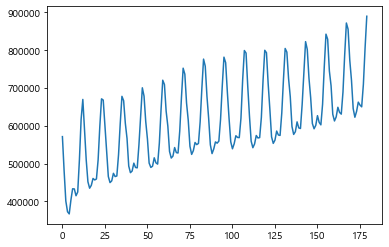

In [109]:
plt.plot(pred_final_IND)

In [110]:
pred_final_IND.shape

(180, 1)

In [111]:
len(y_train_I)

288

In [112]:
y_train_I[-12:],pred_final_IND[:12]

(array([687084, 633396, 616998, 534319, 439949, 446235, 485652, 457970,
        525619, 600890, 665901, 811928], dtype=int64),
 array([[571479.5 ],
        [480663.06],
        [401173.22],
        [372805.22],
        [367022.75],
        [403895.88],
        [433520.22],
        [433096.06],
        [415103.56],
        [425014.84],
        [510441.5 ],
        [617557.1 ]], dtype=float32))

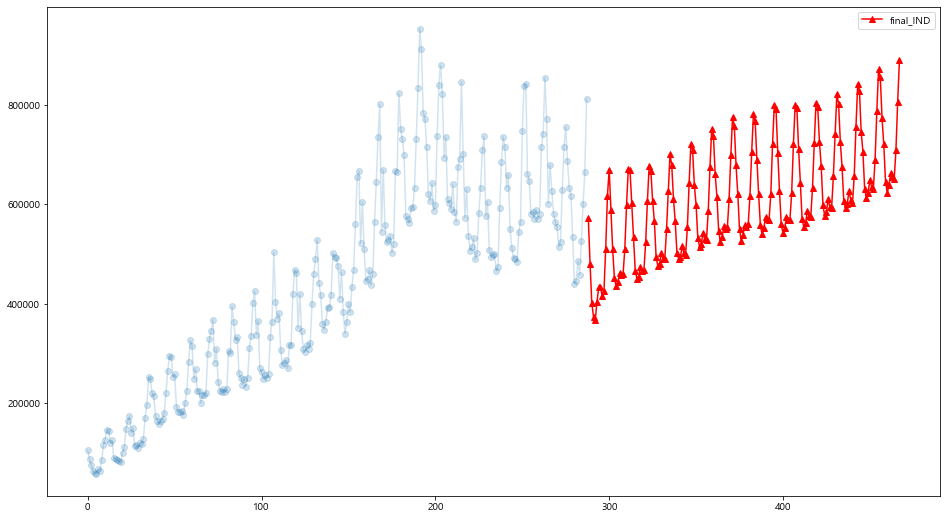

In [113]:
# [ 예측 결과 시각화: 전체흐름 파악용 ]
a_axis = np.arange(0, len(y_train_I))
b_axis = np.arange(len(y_train_I), len(y_train_I) + len(pred_I))
c_axis = np.arange(len(y_train_I), len(y_train_I) + len(pred_final_IND))

plt.figure(figsize=(16,9)) # .reshape(x_train.shape[0],) 
plt.plot(a_axis, y_train_I, 'o-',alpha=0.2) 
#plt.plot(b_axis, pred_I, 'o-', color='blue', label='Predicted')
#plt.plot(b_axis, y_val_I, 'o-', color='green', alpha=0.2, label='Actual')
plt.plot(c_axis, pred_final_IND, '^-', color='red', label='final_IND')
plt.legend()
plt.show()

2. 민수용(CIVIL)

In [114]:
# [ 최종 전용 (학습 300개월, 예측 180개월) ] 

# 학습 데이터
x_train = train_data_scaled #1996~2020
# target 산업용(스케일 X)
y_train_C = train_target_C # 1996~2020

# 최종테스트용 x_test
x_test_final = feature_all_scaled[286:]


x_train.shape, y_train_C.shape, x_test_final.shape

((300, 7), (300,), (192, 7))

In [115]:
# train, valid, test 과거학습 단위 생성

# 과거 12개월-> 다음 1개월 예측( 1996~2014년 )
WINDOW_SIZE = 14

# 산업용
x_train, y_train_C = make_dataset1(x_train, y_train_C, WINDOW_SIZE)

# test용 (2021~2035년)
x_test_final = make_dataset3(x_test_final, WINDOW_SIZE)

print('[ 1996~2015 train/target 데이터 ]')
print(f'x_train.shape: {x_train.shape}, y_train_I.shape: {y_train_C.shape}') 
print()
print('[ 2021~2035 train 데이터 ]')
print(f'x_test_final.shape : {x_test_final.shape}')
print() 

[ 1996~2015 train/target 데이터 ]
x_train.shape: (288, 12, 7), y_train_I.shape: (288,)

[ 2021~2035 train 데이터 ]
x_test_final.shape : (180, 12, 7)



In [116]:
# create LSTM model-------------------------------------------------------------------
from random import shuffle
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model_C = Sequential()
model_C.add(LSTM(32, 
                input_shape=(x_train.shape[1], x_train.shape[2]), 
                activation='relu', 
                return_sequences=False)
            )

model_C.add(Dense(1))

# LSTM model compile-------------------------------------------------------------------

model_C.compile(loss='mae', optimizer='adam')

history = model_C.fit(x_train, y_train_C, 
                                    epochs=200, 
                                    batch_size=16)


Epoch 1/50
18/18 [==============================] - 1s 4ms/step - loss: 787205.8750
Epoch 2/50
18/18 [==============================] - 0s 4ms/step - loss: 758343.1875
Epoch 3/50
18/18 [==============================] - 0s 4ms/step - loss: 465950.0938
Epoch 4/50
18/18 [==============================] - 0s 3ms/step - loss: 373586.0312
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 295377.2500
Epoch 6/50
18/18 [==============================] - 0s 4ms/step - loss: 238104.0000
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 229189.8281
Epoch 8/50
18/18 [==============================] - 0s 4ms/step - loss: 202546.0625
Epoch 9/50
18/18 [==============================] - 0s 3ms/step - loss: 194487.7969
Epoch 10/50
18/18 [==============================] - 0s 4ms/step - loss: 173745.9531
Epoch 11/50
18/18 [==============================] - 0s 4ms/step - loss: 172476.7812
Epoch 12/50
18/18 [==============================] - 0s 4ms/step - loss: 1

In [117]:
pred_final_CIVIL = model_C.predict(x_test)
pred_final_CIVIL.shape

6/6 [==============================] - 0s 4ms/step


(180, 1)

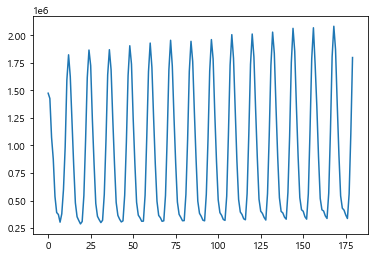

In [118]:
plt.plot(pred_final_CIVIL)

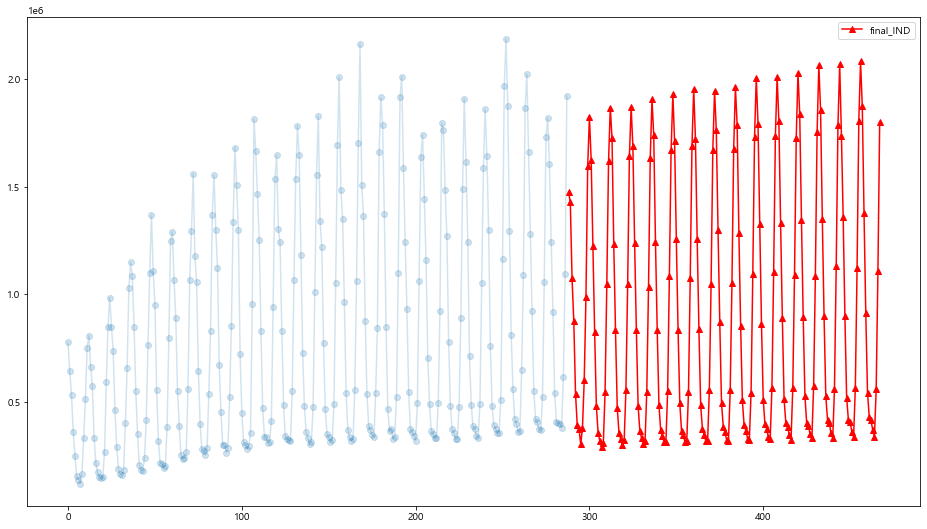

In [119]:
# [ 예측 결과 시각화: 전체흐름 파악용 ]
a_axis = np.arange(0, len(y_train_C))
b_axis = np.arange(len(y_train_C), len(y_train_C) + len(pred_C))
c_axis = np.arange(len(y_train_C), len(y_train_C) + len(pred_final_CIVIL))

plt.figure(figsize=(16,9)) # .reshape(x_train.shape[0],) 
plt.plot(a_axis, y_train_C, 'o-',alpha=0.2) 
#plt.plot(b_axis, pred_I, 'o-', color='blue', label='Predicted')
#plt.plot(b_axis, y_val_I, 'o-', color='green', alpha=0.2, label='Actual')
plt.plot(c_axis, pred_final_CIVIL, '^-', color='red', label='final_IND')
plt.legend()
plt.show()

In [120]:
pred_final_CIVIL.shape

(180, 1)

In [121]:
pred_final_IND.shape

(180, 1)